# CSE527 Homework1
**Due date: 23:59 on Sept 18, 2020 (Friday)**

---
In this semester, we will use Google Colab for the assignments, which allows us to utilize resources that some of us might not have in their local machines such as GPUs. You will need to use your Stony Brook (*.stonybrook.edu) account for coding and Google Drive to save your results.

## Google Colab Tutorial
---
Go to https://colab.research.google.com/notebooks/, you will see a tutorial named "Welcome to Colaboratory" file, where you can learn the basics of using google colab.

Settings used for assignments: ***Edit -> Notebook Settings -> Runtime Type (Python 3)***.


## Local Machine Prerequisites
---
Since we are using Google Colab, all the code is run on the server environment where lots of libraries or packages have already been installed. In case of missing 
 libraries or if you want to install them in your local machine, below are the links for installation.
* **Install Python 3.6.9**: https://www.python.org/downloads/ or use Anaconda (a Python distribution) at https://docs.continuum.io/anaconda/install/. Below are some materials and tutorials which you may find useful for learning Python if you are new to Python.
  - https://docs.python.org/3.6/tutorial/index.html
  - https://www.learnpython.org/
  - https://docs.opencv.org/4.1.2/d6/d00/tutorial_py_root.html
  - http://www.scipy-lectures.org/advanced/image_processing/index.html


* **Install Python packages**: install Python packages: `numpy`, `matplotlib`, `opencv-python` using pip, for example:
```
pip install numpy matplotlib opencv-python
``` 
	Note that when using “pip install”, make sure that the version you are using is python3. Below are some commands to check which python version it uses in you machine. You can pick one to execute:
  
```
    pip show pip
    pip --version
    pip -V
```

In case of the wrong version, use `pip3` for python3 explictly.

* **Install Jupyter Notebook**: follow the instructions at http://jupyter.org/install.html to install Jupyter Notebook and familiarize yourself  with it. *After you have installed Python and Jupyter Notebook, please open the notebook file 'HW1.ipynb' with your Jupyter Notebook and do your homework there.*


## Example
---
Please read through the following examples where we apply image thresholding to an image. This example is desinged to help you get familiar with the basics of Python and routines of OpenCV. This part is for your practice only, you do not need to submit anything from this part.

In [114]:
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage, misc, stats
from IPython.display import display, Image
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import math

In [115]:
# Skip this block if you are NOT working on Colab
# Mount your google drive where you've saved your assignment folder
# Run this block first, then go to the URL it displays and copy the authorization code back.
from google.colab import drive
drive.mount('/content/gdrive/')


Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [116]:
# Skip this block if you are NOT working on Colab
# Replace -----/-----/-----/' with the path such that "CSE527-HW1-fall20" is your working directory
%cd '/content/gdrive/My Drive/CV/CSE527-HW1-fall20'

[Errno 2] No such file or directory: '/content/gdrive/My Drive/CV/CSE527-HW1-fall20'
/content/gdrive/My Drive/CV/CSE527-HW1-fall20


In [117]:
# function for image thresholding
# it's not the best way to do so, but you can learn how to manipulate pixels
def imThreshold(img, threshold, maxVal):
    assert len(img.shape) == 2 # input image has to be gray
    height, width = img.shape
    bi_img = np.zeros((height, width), dtype=np.uint8)
    for y in range(height):
        for x in range(width):
            if img[y, x] > threshold:
                bi_img[y, x] = maxVal
    return bi_img


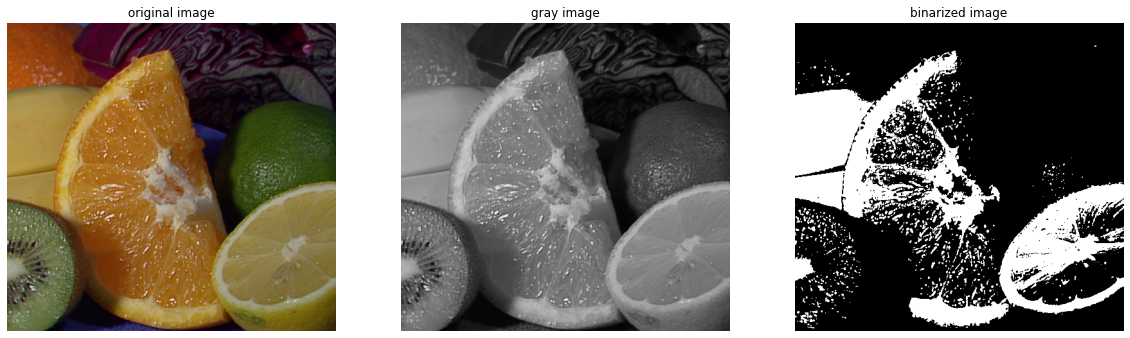

In [118]:
# read the image for local directory (same with this .ipynb) 
img_demo = cv2.imread('SourceImages/fruits.jpg', cv2.IMREAD_COLOR)

# convert a color image to gray
img_gray = cv2.cvtColor(img_demo, cv2.COLOR_BGR2GRAY)

# image thresholding using global tresholder
img_bi = imThreshold(img_gray, 120, 255)

# Be sure to convert the color space of the image from
# BGR (Opencv) to RGB (Matplotlib) before you show a 
# color image read from OpenCV
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
# plt.imshow(cv2.cvtColor(img_demo, cv2.COLOR_BGR2RGB))
plt.imshow(img_demo[..., ::-1])
plt.title('original image')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_gray, 'gray')
plt.title('gray image')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_bi, 'gray')
plt.title('binarized image')
plt.axis("off")

plt.show()

## Description
---
There are six basic image processing problems in total with specific instructions for each of them. Be sure to read **Submission Guidelines** below. They are important.

## Problems
---

- **Problem 1 Gaussian convolution {10 pts}:** 

(a) Write a function in Python that takes two arguments, a width parameter and a variance parameter, and returns a 2D array containing a Gaussian kernel of the desired dimension and variance. The peak of the Gaussian should be in the center of the array. Make sure to normalize the kernel such that the sum of all the elements in the array is 1. Use this function and the OpenCV’s `filter2D` routine to convolve the image and noisy image arrays with a `5x5` Gaussian kernel with sigma of `1`. 

(b) Repeat with a `11x11` Gaussian kernel with a sigma of `3`. There will be four output images from this problem, namely, image convolved with 3x3, 11x11, noisy image convolved with 3x3, and 11x11. Once you fill in and run the codes, the outputs will be saved under Results folder.

Once you fill in and run the codes, the outputs will be saved under `Results` folder. These images will be graded based on the difference with ground truth images. Please only fill in the missing part as indicated by `##########--WRITE YOUR CODE HERE--##########` and do not modify other parts. You might want to try the same thing on other images but it is not required. Include your notebook and the saved state where the output is displayed in the notebook.

The Lenna image is discussed in: https://en.wikipedia.org/wiki/Lenna

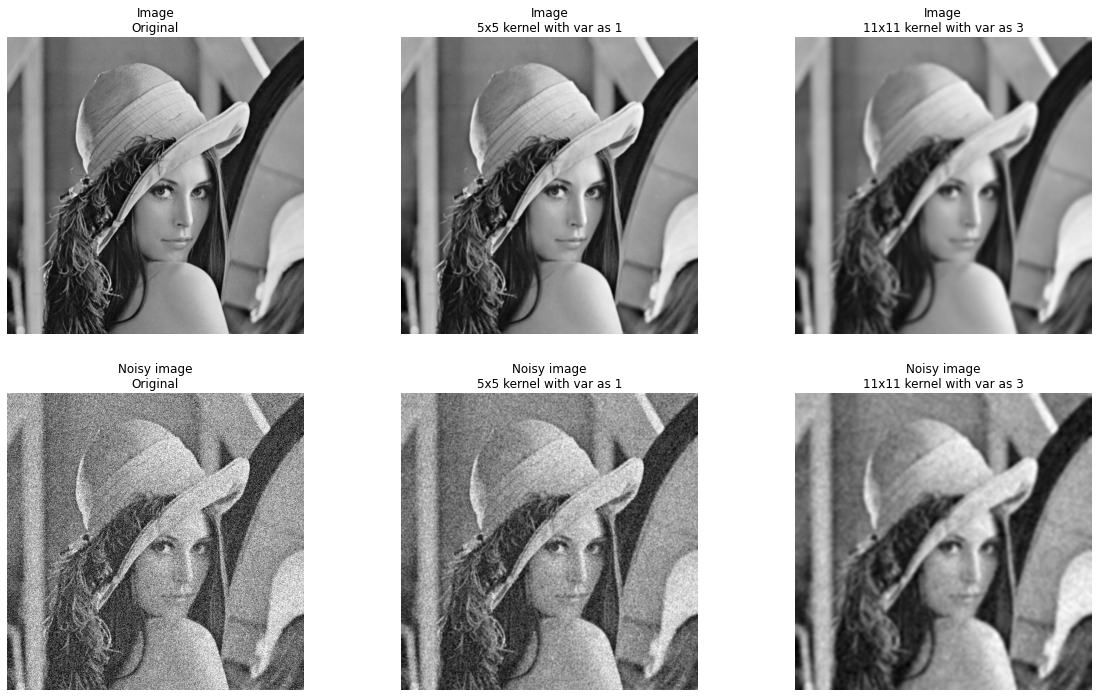

In [120]:
# Load gray image
img = cv2.imread('SourceImages/Lenna.png', cv2.IMREAD_GRAYSCALE)

# Function to generate image with Gaussian noise
def addGaussianNoise(img, mean, std, seed=0):
    # suppose the input image is 2D gray image
    np.random.seed(seed)
    img_noise = img.astype(np.float32) / 255.
    noise = np.random.normal(mean, std, img.shape)
    img_noise = img_noise + noise
    img_noise = np.clip(img_noise, 0., 1.)
    img_noise = (img_noise * 255).astype(np.uint8)
    return img_noise

img_noise = addGaussianNoise(img, 0, 0.15)


def genGaussianKernel(width, sigma):
    ##########--WRITE YOUR CODE HERE--##########
    mean =0    
    x = np.linspace(mean- width/2,mean + width/2 , width)
    diffs = np.diff(x)
    kernel_1d = (stats.norm(0,sigma).pdf(x) * diffs[0])
    kernel_1d /= kernel_1d.sum()
    # N(X, Y) = N(X) . N(Y)
    kernel_2d = np.outer(kernel_1d,kernel_1d)
    ##########-------END OF CODE-------##########
    return kernel_2d


##########--WRITE YOUR CODE HERE--##########
# Generate Gaussian kernels
kernel_1 = genGaussianKernel(5, 1) # 5 by 5 kernel with sigma of 1
kernel_2 = genGaussianKernel(11, 3) # 11 by 11 kernel with sigma of 3

# Convolve with image and noisy image
res_img_kernel1 = cv2.filter2D(img, -1 ,kernel=kernel_1)
res_img_kernel2 = cv2.filter2D(img , -1,kernel=kernel_2)
res_img_noise_kernel1 = cv2.filter2D(img_noise, -1 , kernel=kernel_1)
res_img_noise_kernel2 = cv2.filter2D(img_noise, -1, kernel=kernel_2)
##########-------END OF CODE-------##########

# Write out result images
cv2.imwrite("Results/P1_01.jpg", res_img_kernel1)
cv2.imwrite("Results/P1_02.jpg", res_img_kernel2)
cv2.imwrite("Results/P1_03.jpg", res_img_noise_kernel1)
cv2.imwrite("Results/P1_04.jpg", res_img_noise_kernel2)

# Plot results
plt.figure(figsize = (20, 12))
plt.subplot(2, 3, 1)
plt.imshow(img, 'gray')
plt.title('Image\nOriginal')
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(res_img_kernel1, 'gray')
plt.title('Image\n5x5 kernel with var as 1')
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(res_img_kernel2, 'gray')
plt.title('Image\n11x11 kernel with var as 3')
plt.axis("off")

plt.subplot(2, 3, 4)
plt.imshow(img_noise, 'gray')
plt.title('Noisy image\nOriginal')
plt.axis("off")

plt.subplot(2, 3, 5)
plt.imshow(res_img_noise_kernel1, 'gray')
plt.title('Noisy image\n5x5 kernel with var as 1')
plt.axis("off")

plt.subplot(2, 3, 6)
plt.imshow(res_img_noise_kernel2, 'gray')
plt.title('Noisy image\n11x11 kernel with var as 3')
plt.axis("off")

plt.show()


- **Problem 2 Median filter {20 pts}:** 

(a)Write a function to generate an image with salt and pepper noise. The function takes two arguments, the input image and the probability that a pixel location has salt-pepper noise. A simple implementation can be to select pixel locations with probability 'prob' where noise occurs and then with equal probability set the pixel value at those location to be 0 or 255.

(b)Write a function that takes two images with same size, and return the Peak Signal-to-Noise Ratio (PSNR) value. Understand how PSNR reflects the similarity between two given images or the quality of denoising. Refer to https://en.wikipedia.org/wiki/Peak_signal-to-noise_ratio for its mathematical form. Pay attention that you might need convert between different data types.

(c)Write a function to implement a median filter. The function takes two arguments, an image and a window size(if window size is 'k', then a kxk window is used to determine the median pixel value at a location) and returns the output image. **Do not** use any inbuilt library (like scipy.ndimage_filter) to directly generate the result.(**Hint: Use cv2.copyMakeBorder to add borders**)

You need to generate two noisy images corrupted by salt-and-pepper noise with probability `0.1` and `0.2`. Then use a median filter of `window_size=5` to denoise the two noisy images. You also need to denoise them with Gaussian filters. Try different parameters of Gaussian filters to get as high a PSNR as possible. Fill in all the missing parts and do not modify others.



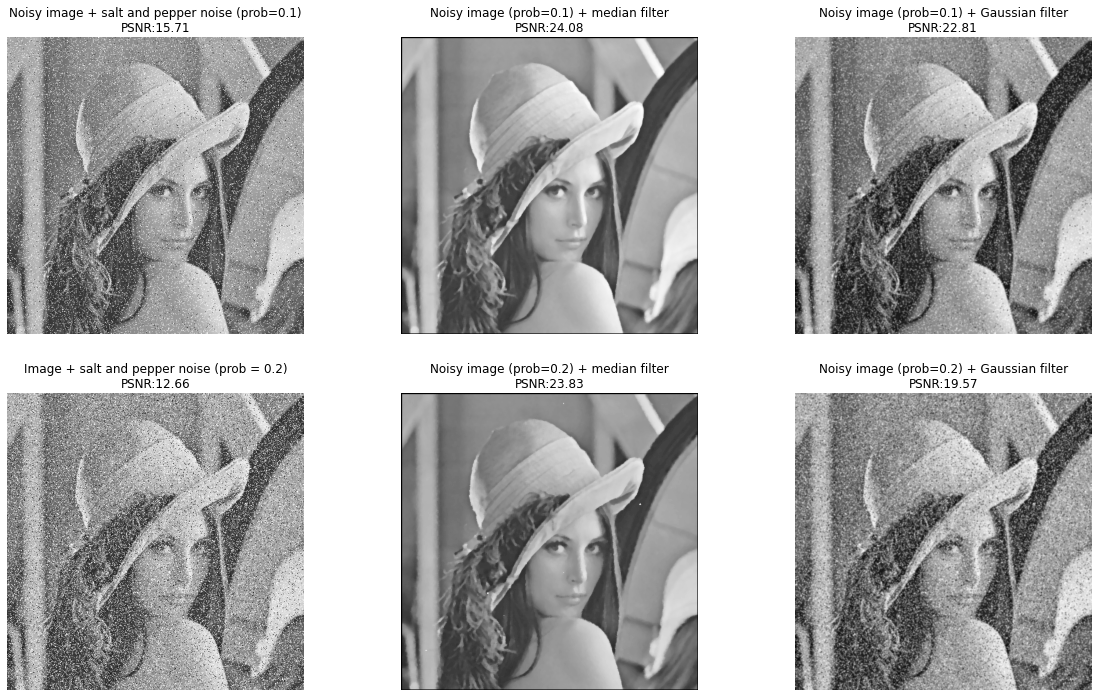

In [121]:
# Function to generate image with salt and pepper noise
def addSaltPepperNoise(img_in, prob, seed=0):
    # suppose the input image is 2D gray image
    # with total probability=prob each pixel is replaced with a pepper(0) or a salt(255) in equal chance 
    np.random.seed(seed)
    ##########--WRITE YOUR CODE HERE--##########
    img_out = np.copy(img_in)
    for i in range(img_in.shape[0]):
      for j in range(img_in.shape[1]):
        if np.random.random(1)[0] <= prob:
          if np.random.random(1)[0] <= prob:
            img_out[i][j] = 0
          else:
            img_out[i][j] = 255
    ##########-------END OF CODE-------##########
    return img_out


# Function to calculate PSNR
def PSNR(img1, img2):
    ##########--WRITE YOUR CODE HERE--##########
    img1 = img1.astype('float64')
    img2 = img2.astype('float64')
    MSE = np.mean(np.square(img1-img2))
    PSNR_value = 20 * np.log10(255) - 10 * np.log10(MSE)
    ##########-------END OF CODE-------##########
    return PSNR_value


# Function to apply median filter(window size kxk) on the input image  
def medianFilter(img_in, window_size=5):
    ##########--WRITE YOUR CODE HERE--########## 
    k = math.floor(window_size/2)
    img_out = np.zeros_like(img_in)
    for i in range(k, img_in.shape[0]- k+1):
      for j in range(k, img_in.shape[1]- k+1):
        img_out[i][j] = np.median(img_in[i-k:i+k+1, j-k:j+k+1])
    ##########-------END OF CODE-------##########
    return img_out


# Generate noisy images
img_s_p1 = addSaltPepperNoise(img, prob=0.1) 
PSNR_s_p1 = PSNR(img, img_s_p1)
img_s_p2 = addSaltPepperNoise(img, prob=0.2)
PSNR_s_p2 = PSNR(img, img_s_p2)


# Apply median filter
res_img_p1_median = medianFilter(img_s_p1, window_size=5)
PSNR_s_p1_median = PSNR(img, res_img_p1_median)
res_img_p2_median = medianFilter(img_s_p2, window_size=5)
PSNR_s_p2_median = PSNR(img, res_img_p2_median)




# Generate Gaussian kernels
##########--WRITE YOUR CODE HERE--########## 
kernel_1 = genGaussianKernel(5, 1) # 5 by 5 kernel with sigma of 1
kernel_2 = genGaussianKernel(11, 3) # 11 by 11 kernel with sigma of 3

res_img_kernel1 = cv2.filter2D(img, -1 ,kernel=kernel_1)
res_img_kernel2 = cv2.filter2D(img , -1,kernel=kernel_2)
res_img_noise_kernel1 = cv2.filter2D(img_noise, -1 , kernel=kernel_1)
res_img_noise_kernel2 = cv2.filter2D(img_noise, -1, kernel=kernel_2)

res_img_p1_gaussian = cv2.filter2D(img_s_p1, -1 ,kernel=kernel_1)
PSNR_s_p1_gaussian = PSNR(img, res_img_p1_gaussian)
res_img_p2_gaussian = cv2.filter2D(img_s_p2, -1 ,kernel=kernel_1)
PSNR_s_p2_gaussian = PSNR(img, res_img_p2_gaussian)
##########-------END OF CODE-------##########


# Save results
cv2.imwrite("Results/P2_01.jpg", res_img_p1_median)    
cv2.imwrite("Results/P2_02.jpg", res_img_p2_median)
cv2.imwrite("Results/P2_03.jpg", res_img_p1_gaussian)    
cv2.imwrite("Results/P2_04.jpg", res_img_p2_gaussian)  


# Plot results
plt.figure(figsize = (20, 12))
plt.subplot(2, 3, 1)
plt.imshow(img_s_p1, 'gray')
plt.title(f'Noisy image + salt and pepper noise (prob=0.1)\nPSNR:{PSNR_s_p1:.2f}')
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(res_img_p1_median, 'gray')
plt.title(f'Noisy image (prob=0.1) + median filter\nPSNR:{PSNR_s_p1_median:.2f}')
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(res_img_p1_gaussian, 'gray')
plt.title(f'Noisy image (prob=0.1) + Gaussian filter\nPSNR:{PSNR_s_p1_gaussian:.2f}')
plt.axis("off")

plt.subplot(2, 3, 4)
plt.imshow(img_s_p2, 'gray')
plt.title(f'Image + salt and pepper noise (prob = 0.2)\nPSNR:{PSNR_s_p2:.2f}')
plt.axis("off")

plt.subplot(2, 3, 5)
plt.imshow(res_img_p2_median, 'gray')
plt.title(f'Noisy image (prob=0.2) + median filter\nPSNR:{PSNR_s_p2_median:.2f}')
plt.axis("off")

plt.subplot(2, 3, 6)
plt.imshow(res_img_p2_gaussian, 'gray')
plt.title(f'Noisy image (prob=0.2) + Gaussian filter\nPSNR:{PSNR_s_p2_gaussian:.2f}')
plt.axis("off")

plt.show()
# """

- **Problem 3 Separable convolutions {15 pts}:** 

The Gaussian kernel is separable, which means that convolution with a 2D Gaussian can be accomplished by convolving the image with two 1D Gaussians, one in the x direction and the other one in the y direction. Perform an `11x11` convolution with `sigma=3` from question 1 using this scheme. You can still use `filter2D` to convolve the images with each of the 1D kernels. Verify that you get the same results with what you did with 2D kernels by computing the difference image between the results from the two methods. This difference image should be close to black. Include your code and results in your colab Notebook file. There is no output image from this part. Be sure to display the result images in the notebook.

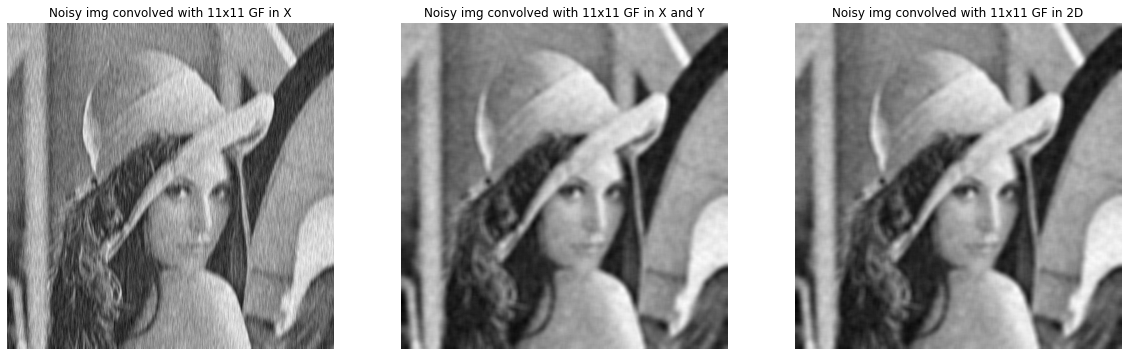

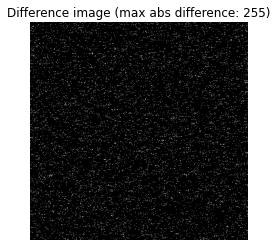

In [122]:
def genGausKernel1D(length, sigma):
    ##########--WRITE YOUR CODE HERE--##########    
    mean =0    
    x = np.linspace(mean- 3,mean + 3 , length)
    diffs = np.diff(x)
    kernel_1d = (stats.norm(0,sigma).pdf(x) * diffs[0])
    kernel_1d /= kernel_1d.sum()
    ##########-------END OF CODE-------##########
    return kernel_1d

# Generate two 1d kernels here
width = 11
sigma = 3

##########--WRITE YOUR CODE HERE--##########  
kernel_x = genGausKernel1D(width, sigma)
kernel_y = genGausKernel1D(width, sigma).T

# Generate a 2d 11x11 kernel with sigma of 3 here as before
kernel_2d = np.outer(kernel_x, kernel_y)

# Convolve with img_noise
res_img_noise_kernel1d_x =  cv2.filter2D(img_noise, -1, kernel_x)

# Applying column vector is still being convoluted horizontally. So, I Transposed the image and kernel so that horizontal filter on Transposed image is equivalent to vertical filter on original image.
res_img_noise_kernel1d_xy =  cv2.filter2D(res_img_noise_kernel1d_x.T, -1, kernel_y.T).T
# res_img_noise_kernel1d_xy = cv2.filter2D(res_img_noise_kernel1d_x, -1, kernel_y.reshape([-1,1])) filter is still applied horizontally


res_img_noise_kernel2d = cv2.filter2D(img_noise, -1, kernel_2d)
##########-------END OF CODE-------##########

# Plot results
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
plt.imshow(res_img_noise_kernel1d_x, 'gray')
plt.title('Noisy img convolved with 11x11 GF in X')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(res_img_noise_kernel1d_xy, 'gray')
plt.title('Noisy img convolved with 11x11 GF in X and Y')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(res_img_noise_kernel2d, 'gray')
plt.title('Noisy img convolved with 11x11 GF in 2D')
plt.axis("off")

plt.show()

##########--WRITE YOUR CODE HERE--##########  
# Compute the difference array here
img_diff = res_img_noise_kernel1d_xy - res_img_noise_kernel2d
##########-------END OF CODE-------##########

plt.gray()
plt.imshow(img_diff, cmap=cm.gray, vmin=0, vmax=255)
plt.axis("off")
plt.title(f'Difference image (max abs difference: {np.max(img_diff)})')
plt.show()
# print("max abs difference: %d" % np.max(img_diff))

- **Problem 4 Laplacian of Gaussian {15 pts}:** 

Convolve a `25x25` Gaussian kernel of `sigma=3` with the discrete approximation to the Laplacian kernel 
$$
\left[\begin{array}{cc} 
1 & 1 & 1\\ 
1 & -8 & 1 \\
1 & 1 & 1\\ 
\end{array}\right]
$$

Use two `25x25` Gaussian kernels with different sigma values to build a Difference of Gaussians (DoG). Decide a pair of best sigma values to make DoG a good approximation of LoG. Plot the first Gaussian kernel (sigma=3), 2D Laplacian of Gaussian and 2D Difference of Gaussian using the `Matplotlib` function `plot`. Then use the `Matplotlib` function `plot_surface` to generate a 3D plot of LoG and DoG. 

Apply two filters to the noisy image generated in **Problem 1**. Include your code and results in your Colab Notebook file.


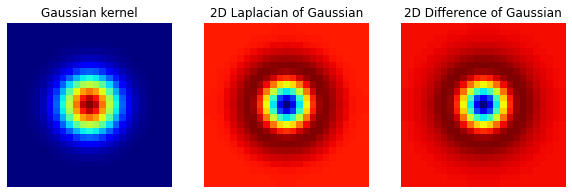

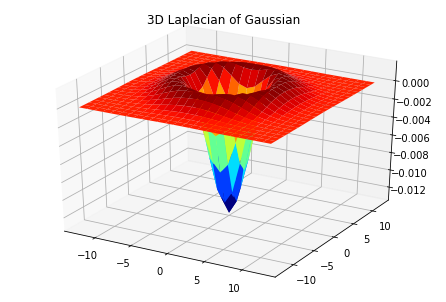

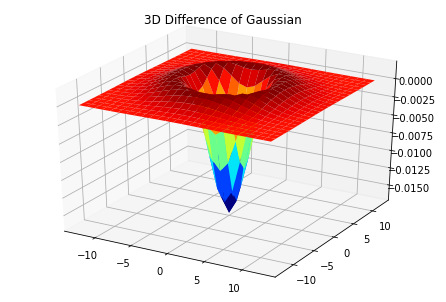

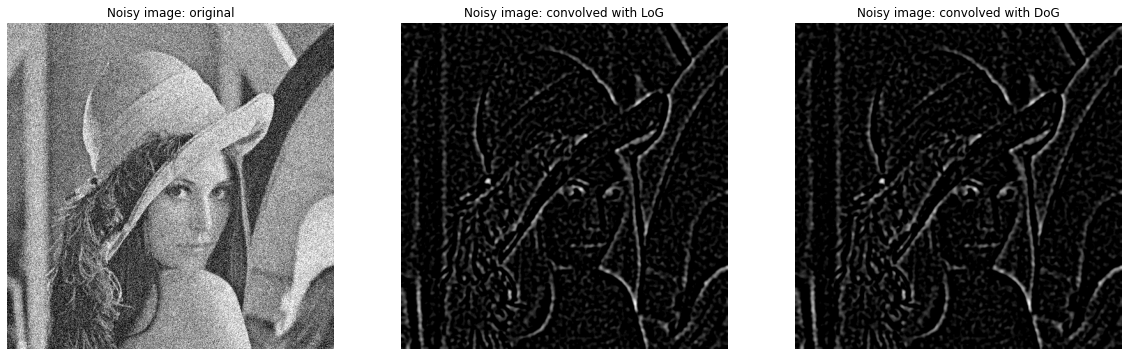

In [123]:
width = 25
sigma = 3

##########--WRITE YOUR CODE HERE--##########
# Create your Laplacian kernel
Laplacian_kernel = np.array([[1,1,1], [1,-8, 1], [1,1,1]])

# Create your Gaussian kernel
Gaussian_kernel = genGaussianKernel(width, sigma)
Gaussian_kernel_1 = genGaussianKernel(width, 2.5)
Gaussian_kernel_2 = genGaussianKernel(width, 4)
# thick- thin

# Create your Laplacian of Gaussian
LoG = cv2.filter2D(Gaussian_kernel, -1, Laplacian_kernel)
##########-------END OF CODE-------##########

# Difference of Gaussian
DoG = Gaussian_kernel_2 - Gaussian_kernel_1


# Plot Laplacian and Difference of Gaussian
fig = plt.figure(figsize=(10, 6))
plt.subplot(1, 3, 1)
plt.imshow(Gaussian_kernel, interpolation='none', cmap=cm.jet)
plt.title('Gaussian kernel')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(LoG, interpolation='none', cmap=cm.jet)
plt.title('2D Laplacian of Gaussian')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(DoG, interpolation='none', cmap=cm.jet)
plt.title('2D Difference of Gaussian')
plt.axis("off")

# Plot the 3D figure of LoG and DoG
##########--WRITE YOUR CODE HERE--##########
fig = plt.figure()
ax = Axes3D(fig)
# Fill in your code here
x = np.linspace(0- width/2,0 + width/2 , width)

xs = np.repeat(x, x.shape[0], 0).reshape(-1, x.shape[0])
ys = xs.T

ax.plot_surface(xs, ys, LoG, cmap=cm.jet,  edgecolor='none')
plt.title('3D Laplacian of Gaussian')
plt.show()


fig = plt.figure()
ax = Axes3D(fig)
# Fill in your code here
ax.plot_surface(xs, ys, DoG, cmap=cm.jet,  edgecolor='none')
plt.title('3D Difference of Gaussian')
plt.show()
##########-------END OF CODE-------##########

# Convolve the image disrupted by Gaussian noise `img_noise` with LoG and DoG
##########--WRITE YOUR CODE HERE--##########
img_noise_LoG = cv2.filter2D(img_noise, -1, LoG)
img_noise_DoG = cv2.filter2D(img_noise, -1, DoG)
##########-------END OF CODE-------##########

cv2.imwrite("Results/P4_01.jpg", img_noise_LoG)  

# Plot results
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
plt.imshow(img_noise, 'gray')
plt.title('Noisy image: original')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_noise_LoG, 'gray')
plt.title('Noisy image: convolved with LoG')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_noise_DoG, 'gray')
plt.title('Noisy image: convolved with DoG')
plt.axis("off")
plt.show()


- **Problem 5 Histogram equalization {20 pts}:** 

Refer to Szeliski's book on section 3.4.1, and within that section to eqn 3.9 for more information on histogram equalization. Getting the histogram of a grayscale image is incredibly easy with python. A histogram is a vector of numbers. Once you have the histogram, you can get the cumulative distribution function (CDF) from it. Then all you have left is to find the mapping from each value [0,255] to its adjusted value (just using the CDF basically). **DO NOT** use **cv2.equalizeHist()** directly to solve the exercise!  

We will expect to see in your code that you get the PDF and CDF, and that you manipulate the pixels directly (avoid a for loop, though.  **Hint: Use np.vectorize**) Complete the function `histEqSingleChannel` to be able to process the grayscale image. Then transform the color image into HSV color space in function `histEqHSV`,and call `histEqSingleChannel` for and **ONLY** for the V channel. You can compare the result of `histEqHSV` with `histEqBGR`. 

There will be one output image from this part which is the histogram equalized image from `histEqHSV`. It will be compared against the ground truth.


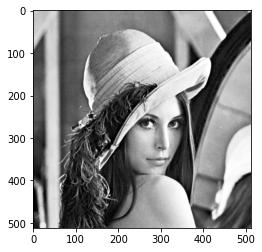

In [124]:
hist = cv2.calcHist([img],[0],None,[256],[0,256]) 
PDF = hist / np.sum(hist)
histCDF = PDF.cumsum()
histCDF = 255 * histCDF
# plt.plot(histCDF)
norm = np.interp(img.ravel(), list(range(256)), histCDF)
new_img = norm.reshape(img.shape)
plt.imshow(new_img)
# hist.shape


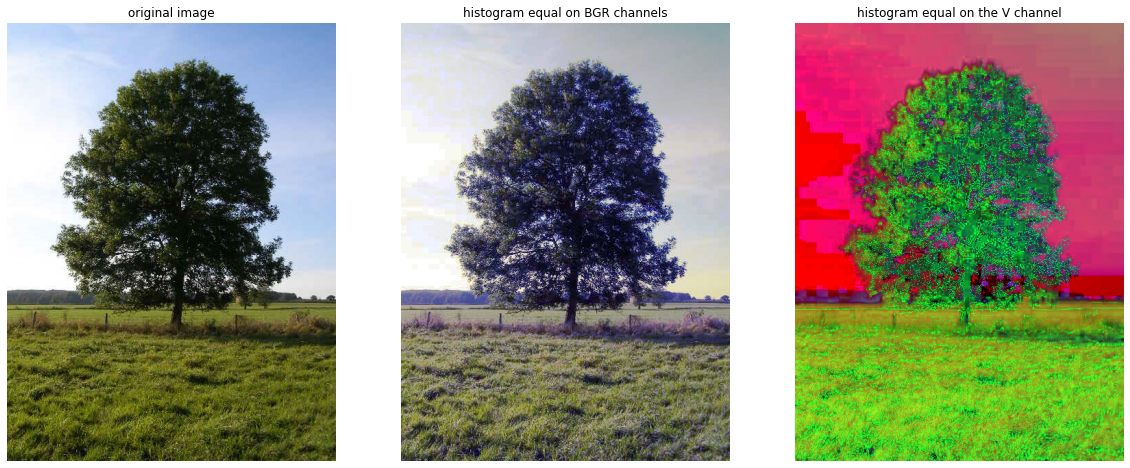

In [125]:
def histEqSingleChannel(img_in):
    #########--WRITE YOUR CODE HERE--##########
    hist = cv2.calcHist([img_in],[0],None,[256],[0,256]) 
    PDF = hist / np.sum(hist)
    histCDF = PDF.cumsum()
    histCDF = 255 * histCDF
    norm = np.interp(img_in.ravel(), list(range(256)), histCDF)
    img_out = norm.reshape(img_in.shape)
    ##########-------END OF CODE-------##########
    return img_out


def histEqHSV(img_in):
    #########--WRITE YOUR CODE HERE--##########

    img_in = cv2.cvtColor(img_in, cv2.COLOR_BGR2HSV)
    V_layer = img_in[:,:,2]
    hist = cv2.calcHist([V_layer], [0], None, [256], [0,256])
    PDF = hist / np.sum(hist)
    histCDF = PDF.cumsum()
    histCDF = 255 * histCDF
    norm = np.interp(V_layer.ravel(), list(range(256)), histCDF)
    new_V = norm.reshape(V_layer.shape)
    img_out = img_in.copy()
    img_out[:,:,2] = new_V
    ##########-------END OF CODE-------##########
    return img_out


# The wrong way to apply histogram equalization to color images
# It will change the original colors
def histEqBGR(img_in):
    img_out = img_in.copy()
    for c in range(img_in.shape[2]):
        img_out[:, :, c] = histEqSingleChannel(img_in[:, :, c])
    return img_out


# Read input image
img_equal = cv2.imread('SourceImages/tree.jpg', cv2.IMREAD_COLOR)

# Histogram equalization
res_img_equal = histEqBGR(img_equal)
res_img_equal_hsv = histEqHSV(img_equal)

# Write out results
cv2.imwrite("Results/P5_01.jpg", res_img_equal_hsv)

# Plot results
fig = plt.figure(figsize=(20, 15))
plt.subplot(1, 3, 1)
plt.imshow(img_equal[..., ::-1])
plt.title('original image')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(res_img_equal[..., ::-1])
plt.title('histogram equal on BGR channels')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(res_img_equal_hsv[..., ::-1])
plt.title('histogram equal on the V channel')
plt.axis("off")

plt.show()


- **Problem 6 Low and high pass filters {20 pts}:**  

Start with the following tutorials:<br>
https://docs.opencv.org/4.1.2/de/dbc/tutorial_py_fourier_transform.html <br>
https://docs.opencv.org/4.1.2/d8/d01/tutorial_discrete_fourier_transform.html

For your LPF (low pass filter), mask a `60x60` window of the center of the FT (Fourier Transform) image (the low frequencies). For the HPF (high pass filter), mask a `20x20` window excluding the center. The filtered low and high pass images will be the two outputs from this part and automatically saved to the Results folder.

In this problem we have an additional experiment. Some Gaussian noise was added to the original image. Compare the PSNR of the noisy image to the PSNR of the image from the LPF and discuss whether PSNR is always the best method to evaluate image quality?


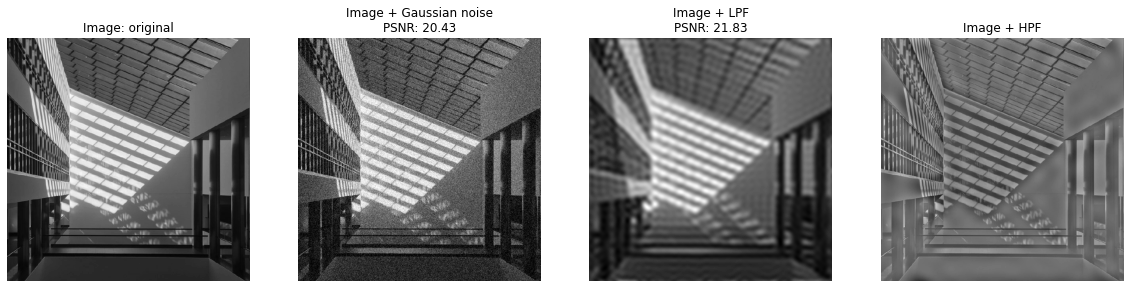

In [128]:
def high_pass_filter(img_in):
    ##########--WRITE YOUR CODE HERE--##########
    freq = np.fft.fft2(img_in)
    freq = np.fft.fftshift(freq)
    # freq = 20*np.log(np.abs(freq))
    rows, cols = freq.shape
    freq[(rows//2)-10: (rows//2)+10, (cols//2)-10:(cols//2)+10] = 0
    freq = np.fft.ifftshift(freq)
    freq = np.fft.ifft2(freq)
    img_out = np.real(freq)
    ##########-------END OF CODE-------########## 
    return img_out


def low_pass_filter(img_in):
    ##########--WRITE YOUR CODE HERE--##########

    freq = np.fft.fft2(img_in)
    freq = np.fft.fftshift(freq)
    temp = 20*np.log(np.abs(freq))
    rows, cols = freq.shape
    img_out = np.zeros_like(freq)
    img_out[(rows//2)-30: (rows//2)+30, (cols//2)-30:(cols//2)+30] = freq[(rows//2)-30: (rows//2)+30, (cols//2)-30:(cols//2)+30]
    # temp = 20*np.log(np.abs(img_out))

    # plt.imshow(temp, "gray")
    img_out = np.fft.ifftshift(img_out)
    img_out = np.fft.ifft2(img_out)
    img_out = np.real(img_out)

    ##########-------END OF CODE-------##########   
    return img_out


# Read in input images
img_filter = cv2.imread('SourceImages/library.jpg', cv2.IMREAD_GRAYSCALE)

# Low and high pass filter
res_img_lowpass  = low_pass_filter(img_filter)
res_img_highpass = high_pass_filter(img_filter)


# Generate noisy image and calculate PSNR
res_img_noise = addGaussianNoise(img_filter, 0, 0.1)
PSNR_losspass = PSNR(img_filter, res_img_lowpass)
PSNR_noisy = PSNR(img_filter, res_img_noise)

# Write out results
cv2.imwrite("Results/P6_01.jpg", res_img_lowpass)
cv2.imwrite("Results/P6_02.jpg", res_img_highpass)

# Plot results
fig = plt.figure(figsize=(20, 6))
plt.subplot(1, 4, 1)
plt.imshow(img_filter, 'gray')
plt.title('Image: original')
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(res_img_noise, 'gray')
plt.title(f'Image + Gaussian noise\nPSNR: {PSNR_noisy:.2f}')
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(res_img_lowpass, 'gray')
plt.title(f'Image + LPF\nPSNR: {PSNR_losspass:.2f}')
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(res_img_highpass, 'gray')
plt.title('Image + HPF')
plt.axis("off")
plt.show()


#**Discuss whether PSNR is always the best method to evaluate image quality?**

PSNR is not always the best method to evaluate image quality. As PSNR value is just based on the difference of the image with original image. i.e, it will consider any enhancement that has been done on the image as Noise.
Ex: consider an image for which we have done Histogram Equalization, This process will create a difference in the pixel values but it has only made the image better. However, PSNR will percieve this as Noise.


## Submission guidelines
---
Your need to submit a single zip file to Blackboard described as follow.

Please generate a pdf file that includes a ***google shared link*** (explained in the next paragraph). This pdf file should be named as ***Surname_Givenname_SBUID_hw*\*.pdf** (example: Jordan_Michael_111234567_hw1.pdf for this assignment).

To generate the ***google shared link***, first create a folder named ***Surname_Givenname_SBUID_hw**** in your Google Drive with your Stony Brook account. The structure of the files in the folder should be exactly the same as the one you downloaded. For instance in this homework:

```
Surname_Givenname_SBUID_hw1
        |---Results
        |---SourceImages
        |---CSE527-HW1-fall20.ipynb
```
Note that this folder should be in your Google Drive with your Stony Brook account.

Then right click this folder, click ***Get shareable link***, in the People textfield, enter the TA's email: ***xiang.li.7@stonybrook.edu***. Make sure that TAs who have the link **can edit**, ***not just*** **can view**, and also **uncheck** the **Notify people** box.

Note that in google colab, we will only grade the version of the code right before the timestamp of the submission made in blackboard. 

To submit to Blackboard, zip ***Surname_Givenname_SBUID_hw*\*.pdf** and ***Surname_Givenname_SBUID_hw**** folder together and name your zip file as ***Surname_Givenname_SBUID_hw*\*.zip**. 

The input and output paths are predefined and **DO NOT** change them, (we assume that 'Surname_Givenname_SBUID_hw1' is your working directory, and all the paths are relative to this directory).  The image read and write functions are already written for you. All you need to do is to fill in the blanks as indicated to generate proper outputs.


-- DO NOT change the folder structure, please just fill in the blanks. <br>

You are encouraged to post and answer questions on Piazza. Based on the amount of email that we have received in past years, there might be dealys in replying to personal emails. Please ask questions on Piazza and send emails only for personal issues.

If you alter the folder structures, the grading of your homework will be significantly delayed and possibly penalized.

Be aware that your code will undergo plagiarism check both vertically and horizontally. Please do your own work.

Late submission penalty: <br>
There will be a 10% penalty per day for late submission. However, you will have 4 days throughout the whole semester to submit late without penalty. Note that the grace period is calculated by days instead of hours. If you submit the homework one minute after the deadline, one late day will be counted. Likewise, if you submit one minute after the deadline, the 10% penaly will be imposed if not using the grace period.
